In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Input, PReLU
from keras.optimizers import Adam
from keras.utils import Sequence
import matplotlib.pyplot as plt


In [2]:
Z_DIM = 100
BATCH_SIZE = 1024
BATCHES = 100
EPOCHS = 250

In [3]:
encoder = Sequential(name="encoder")
encoder.add(Conv2D(64, (5, 5), strides=(2, 2), padding="same", input_shape=[28, 28, 1], activation=PReLU()))
encoder.add(Dropout(0.3))
encoder.add(Conv2D(128, (5, 5), strides=(2, 2), padding="same", activation=PReLU()))
encoder.add(Dropout(0.3))
encoder.add(Conv2D(256, (5, 5), strides=(2, 2), padding="same", activation=PReLU()))
encoder.add(Flatten())
encoder.add(Dropout(0.3))
encoder.add(Dense(1024, activation=PReLU()))
encoder.add(Dropout(0.3))
encoder.add(Dense(256, activation=PReLU()))
encoder.add(Dropout(0.3))
encoder.add(Dense(Z_DIM, activation="tanh"))
encoder.compile()
generator = load_model("generator.h5")
generator.trainable = False
trainer_input = Input(shape=(Z_DIM,))
trainer = Model(trainer_input, encoder(generator(trainer_input)), name="trainer")
trainer.compile(optimizer=Adam(learning_rate=0.0001), loss="mse")

In [4]:
class ZGenerator(Sequence):
    def __init__(self, batch_size):
        self.batch_size = batch_size

    def __len__(self):
        return BATCHES * self.batch_size

    def __getitem__(self, idx):
        z = np.random.uniform(-1, 1, size=(self.batch_size, Z_DIM))
        return z, z



In [5]:
z_generator = ZGenerator(BATCH_SIZE)
history = trainer.fit(z_generator, steps_per_epoch=BATCHES, epochs=EPOCHS)

Epoch 1/250


2023-08-18 02:53:38.021871: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape intrainer/encoder/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


100/100 [==============================] - 15s 99ms/step - loss: 0.3317
Epoch 2/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3218
Epoch 3/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3153
Epoch 4/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3117
Epoch 5/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3092
Epoch 6/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3072
Epoch 7/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3057
Epoch 8/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3044
Epoch 9/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3034
Epoch 10/250
100/100 [==============================] - 10s 98ms/step - loss: 0.3026
Epoch 11/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3018
Epoch 12/250
100/100 [==============================] - 10s 99ms/step - loss: 0.3010
E

In [6]:
encoder.save("encoder.h5")

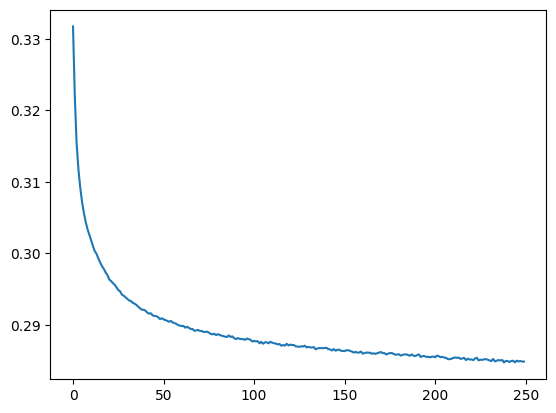

1/1 [==============================] - 0s 206ms/step
0.2837353273226171


In [7]:
plt.plot(history.history["loss"])
plt.show()
z = np.random.uniform(-1, 1, size=(10, Z_DIM))
x = generator.predict(z)
x = encoder.predict(x)
print(np.average((z - x) ** 2))
